In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set styles
sns.set(style='whitegrid')

In [4]:
# Load the CSV file
df = pd.read_csv('Car_sales.csv')

In [5]:
# Preview dataset
print(df.columns)
df.head()

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [6]:
# Rename columns for easier access (optional)
df.columns = [col.strip().replace(" ", "_").replace(".", "").replace(",", "") for col in df.columns]

In [7]:
# Check for missing values
print(df.isnull().sum())

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64


In [8]:
# Optionally drop rows with too many NaNs
df.dropna(inplace=True)

In [9]:
# Convert data types if needed
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], errors='coerce')
df['Sales_in_thousands'] = pd.to_numeric(df['Sales_in_thousands'], errors='coerce')
df['Price_in_thousands'] = pd.to_numeric(df['Price_in_thousands'], errors='coerce')

In [10]:
# Summary statistics
print(df.describe())

       Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count          117.000000           117.000000          117.000000   
mean            59.112316            18.031538           25.969487   
std             75.058933            11.605632           14.149699   
min              0.110000             5.160000            9.235000   
25%             16.767000            11.240000           16.980000   
50%             32.299000            14.010000           21.665000   
75%             76.029000            19.875000           29.465000   
max            540.561000            67.550000           82.600000   

       Engine_size  Horsepower   Wheelbase       Width      Length  \
count   117.000000  117.000000  117.000000  117.000000  117.000000   
mean      3.048718  181.282051  107.326496   71.189744  187.717949   
std       1.055169   58.591786    8.050588    3.530151   13.849926   
min       1.000000   55.000000   92.600000   62.600000  149.400000   
25%       2.200000 

In [11]:
# Unique car types
print("Vehicle Types:", df['Vehicle_type'].unique())

Vehicle Types: ['Passenger' 'Car']


In [12]:
# Sales by Manufacturer
sales_by_manufacturer = df.groupby('Manufacturer')['Sales_in_thousands'].sum().sort_values(ascending=False)
print(sales_by_manufacturer)

Manufacturer
Ford          1846.965
Dodge          720.798
Toyota         675.086
Honda          592.674
Chevrolet      446.370
Pontiac        330.962
Jeep           293.153
Nissan         280.472
Buick          242.019
Mercury        237.999
Mitsubishi     180.895
Volkswagen     159.749
Hyundai        137.326
Chrysler       117.545
Saturn         110.389
Cadillac        81.450
Mercedes-B      66.079
Acura           64.891
Lincoln         62.709
Plymouth        62.129
Oldsmobile      60.180
Lexus           43.145
Audi            40.557
BMW             26.758
Infiniti        23.713
Porsche         12.128
Name: Sales_in_thousands, dtype: float64


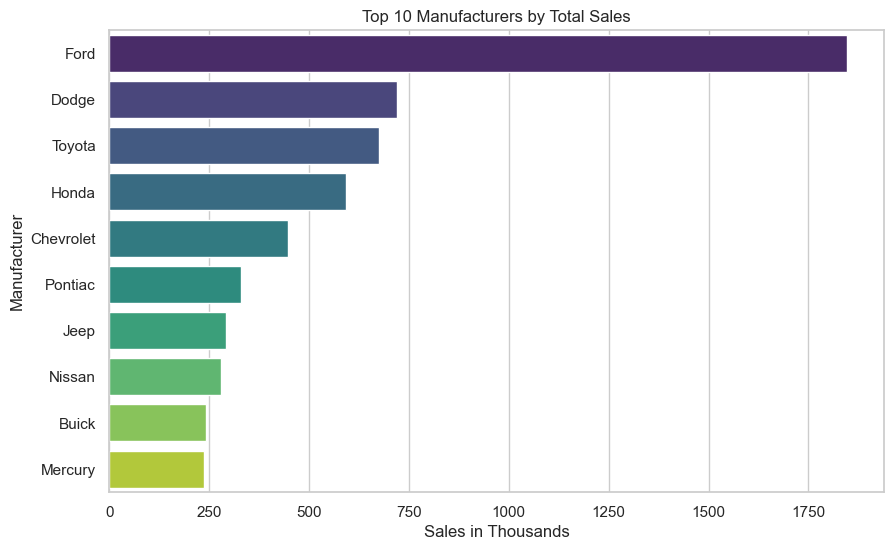

In [14]:
top10 = sales_by_manufacturer.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")
plt.title("Top 10 Manufacturers by Total Sales")
plt.xlabel("Sales in Thousands")
plt.ylabel("Manufacturer")
plt.show()

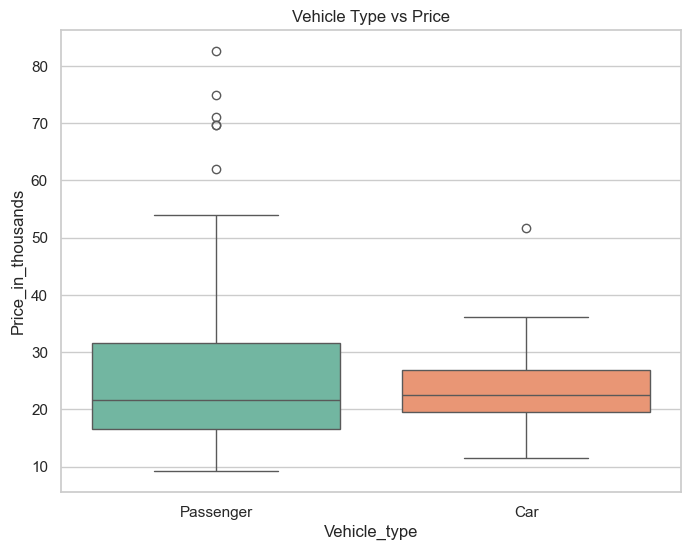

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Vehicle_type', y='Price_in_thousands', palette='Set2')
plt.title("Vehicle Type vs Price")
plt.show()

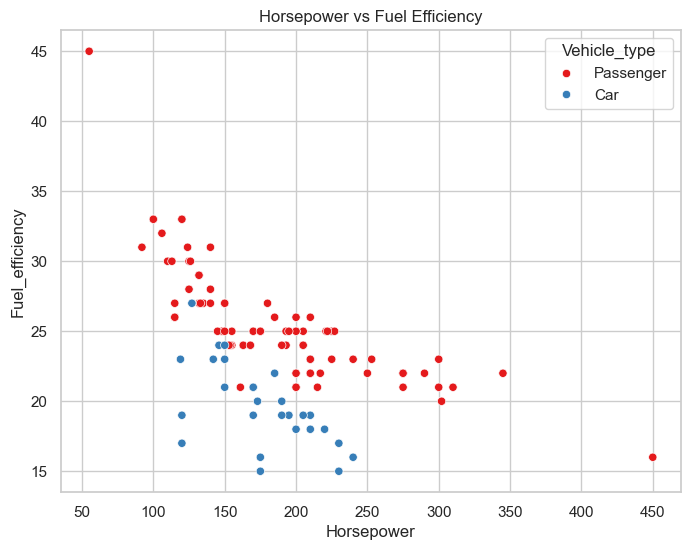

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Horsepower', y='Fuel_efficiency', hue='Vehicle_type', palette='Set1')
plt.title("Horsepower vs Fuel Efficiency")
plt.show()

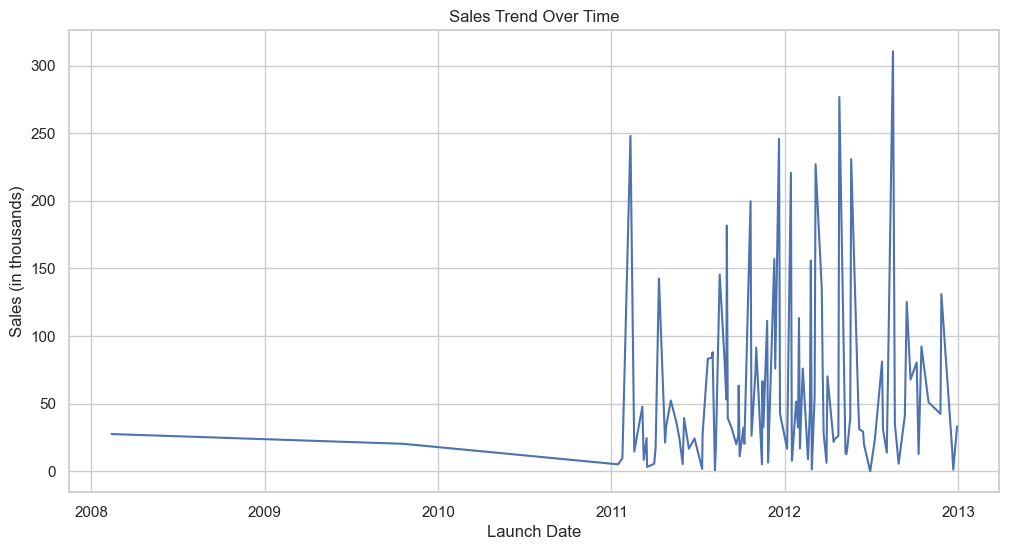

In [20]:
#Sort by launch date
df_sorted = df.sort_values(by='Latest_Launch')

plt.figure(figsize=(12,6))
sns.lineplot(x='Latest_Launch', y='Sales_in_thousands', data=df_sorted, ci=None)
plt.title("Sales Trend Over Time")
plt.xlabel("Launch Date")
plt.ylabel("Sales (in thousands)")
plt.show()

In [18]:
print("Average resale value per car type:")
print(df.groupby('Vehicle_type')['__year_resale_value'].mean())

print("\nTop performing car by power-to-weight ratio:")
df['Power_to_weight'] = df['Horsepower'] / df['Curb_weight']
print(df.sort_values(by='Power_to_weight', ascending=False)[['Manufacturer', 'Model', 'Power_to_weight']].head(1))

Average resale value per car type:
Vehicle_type
Car          16.186034
Passenger    18.639716
Name: __year_resale_value, dtype: float64

Top performing car by power-to-weight ratio:
   Manufacturer  Model  Power_to_weight
39        Dodge  Viper       133.333333


In [21]:
# Drop non-numeric and irrelevant columns for now
df_model = df.copy()

# Drop columns that won't help prediction or are identifiers
df_model = df_model.drop(['Manufacturer', 'Model', 'Latest_Launch'], axis=1)

# Convert categorical feature 'Vehicle_type' to numeric using one-hot encoding
df_model = pd.get_dummies(df_model, columns=['Vehicle_type'], drop_first=True)

# Define features and target
X = df_model.drop('Sales_in_thousands', axis=1)
y = df_model['Sales_in_thousands']

In [22]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Linear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R^2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Performance:
RMSE: 71.91531961268315
R^2 Score: 0.06621855632274487


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
print("\nRandom Forest Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
RMSE: 81.55270411562397
R^2 Score: -0.2008233971920348


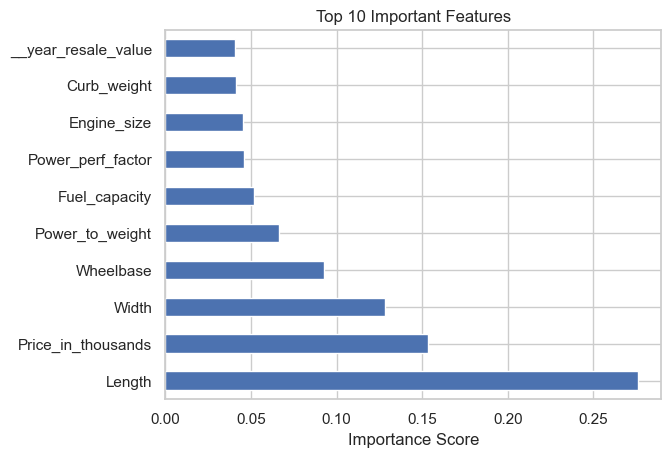

In [25]:
# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', title="Top 10 Important Features")
plt.xlabel("Importance Score")
plt.show()

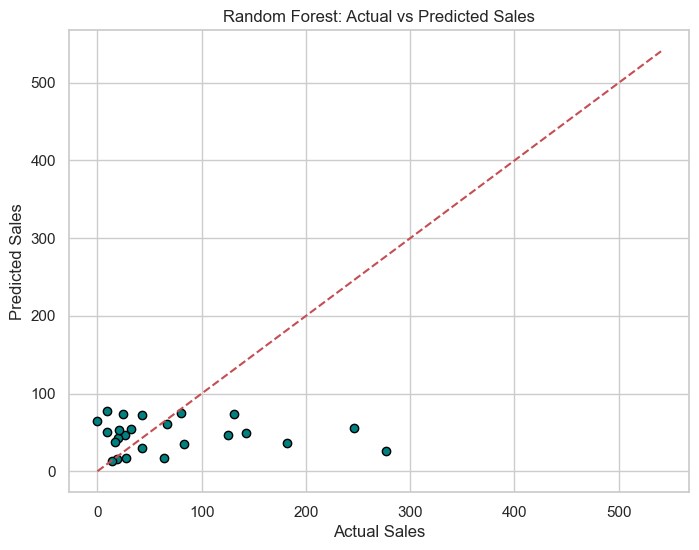

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='teal', edgecolor='black')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Reference line
plt.show()